# Feature Shuffling using Feature Engine by `Mr. Harshit Dawar!`

In [1]:
# Importing the required Libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from feature_engine.selection import SelectByShuffling

In [2]:
# Loading the Dataset

data = pd.read_csv("../ds/Titanic.csv")
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.590495,1,0,-0.500240,S
1,1,1,female,0.643971,1,0,0.788947,C
2,1,3,female,-0.281878,0,0,-0.486650,S
3,1,1,female,0.412509,1,0,0.422861,S
4,0,3,male,0.412509,0,0,-0.484133,S


In [3]:
X = data.drop("Survived", axis = 1)
y = data.Survived

In [4]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,-0.590495,1,0,-0.500240,S
1,1,female,0.643971,1,0,0.788947,C
2,3,female,-0.281878,0,0,-0.486650,S
3,1,female,0.412509,1,0,0.422861,S
4,3,male,0.412509,0,0,-0.484133,S
...,...,...,...,...,...,...,...
884,2,male,-0.204724,0,0,-0.384475,S
885,1,female,-0.821957,0,0,-0.042213,S
886,3,female,0.003524,1,2,-0.174084,S
887,1,male,-0.281878,0,0,-0.042213,C


In [5]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: Survived, Length: 889, dtype: int64

In [12]:
# Encoding the Categorical Variables

X.Embarked = LabelEncoder().fit_transform(X.Embarked)
X.Sex = LabelEncoder().fit_transform(X.Sex)

# Dividing the Dataset into Train & Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [23]:
# Generating Feature Selector
Feature_Selector = SelectByShuffling(estimator = RandomForestClassifier(),
                                     scoring = "accuracy",
                                     variables = None,
                                     threshold = 0,
                                     cv = 5,
                                     )

Feature_Selector.fit(x_train, y_train)

SelectByShuffling(cv=5, scoring='accuracy', threshold=0,
                  variables=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
                             'Embarked'])

In [24]:
Feature_Selector.initial_model_performance_

0.8026490066225165

In [25]:
Feature_Selector.performance_drifts_

{'Pclass': -0.030198675496688865,
 'Sex': 0.06596026490066209,
 'Age': -0.0007947019867551308,
 'SibSp': -0.10463576158940402,
 'Parch': -0.11682119205298025,
 'Fare': -0.02596026490066239,
 'Embarked': -0.08900662251655633}

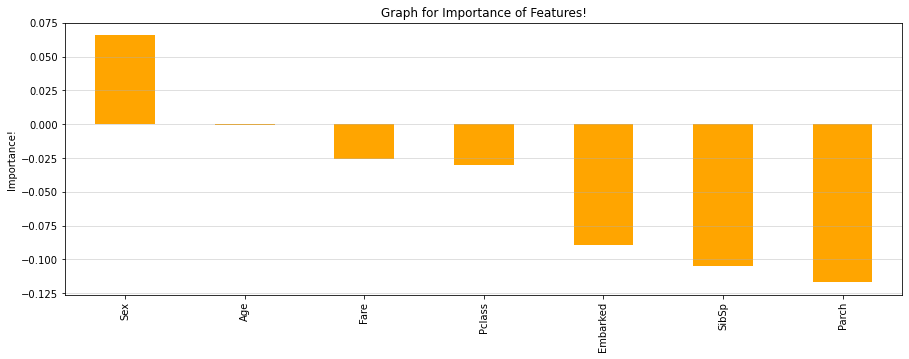

In [26]:
# Checking Feature Importance

Feature_Importance = pd.Series(Feature_Selector.performance_drifts_, index = X.columns)
Feature_Importance.sort_values(ascending = False).plot.bar(figsize = (15, 5), color = "orange")
plt.grid(axis = "y", alpha = 0.5, animated = True)
plt.ylabel("Importance!")
plt.title("Graph for Importance of Features!")
plt.show()

In [27]:
Feature_Selector.features_to_drop_

['SibSp', 'Parch', 'Embarked']

In [28]:
# Building the Model with all the Features
Model1 = RandomForestClassifier()
Model1.fit(x_train, y_train)

RandomForestClassifier()

In [29]:
y_pred_whole = Model1.predict(x_test)

In [30]:
# Accuracy using all the Features
accuracy_score(y_test, y_pred_whole)

0.8507462686567164

In [31]:
# Building with the selected Features
x_train = Feature_Selector.transform(x_train)

In [32]:
Model2 = RandomForestClassifier()
Model2.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
x_test = Feature_Selector.transform(x_test)

In [34]:
y_pred_with_selected_features = Model2.predict(x_test)

In [35]:
# Accuracy using the Selected Features!
accuracy_score(y_test, y_pred_with_selected_features)

0.8283582089552238

***As you can see, when the unneccessary Features are dropped, the performance is increased as compared to the initial Model Performance shown in the above cells, but as compared to the Model Performance with all the Features, there is slight decrease, this can be due to the random weight Initialized at the time of Model Fitting. On the other hand, you are also saving a lot of Computation while using less features!***

# Congratulations, you have learned a new Way of Feature Selection!